**📓 Data Analysis & Visualization – Diwali Sales Dataset**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid", palette="muted")

# 1. Load the uploaded dataset
df = pd.read_csv('/content/Diwali.csv', encoding='unicode_escape')  # path in Colab

# Quick check
df.head(10)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Data Cleaning**

In [3]:
# Check dataset info
df.info()

# Drop irrelevant/unnamed columns if present
df.drop(columns=['Status', 'unnamed1'], inplace=True, errors='ignore')

# Check for missing values
df.isnull().sum()

# Drop missing values
df.dropna(inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Quick check
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


**Basic Exploration**

In [4]:
print("Shape of dataset:", df.shape)

# Statistical summary
df.describe(include="all").T

# Unique values per column
df.nunique()


Shape of dataset: (11239, 13)


,0
User_ID,3752
Cust_name,1250
Product_ID,2350
Gender,2
Age Group,7
Age,81
Marital_Status,2
State,16
Zone,5
Occupation,15


**Demographics Analysis**

***Gender Distribution***

/tmp/ipython-input-3183395251.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


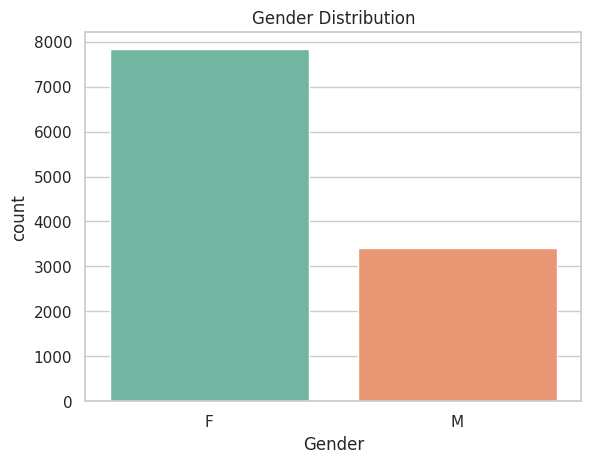

/tmp/ipython-input-3183395251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Amount', data=sales_by_gender, palette='Set1')


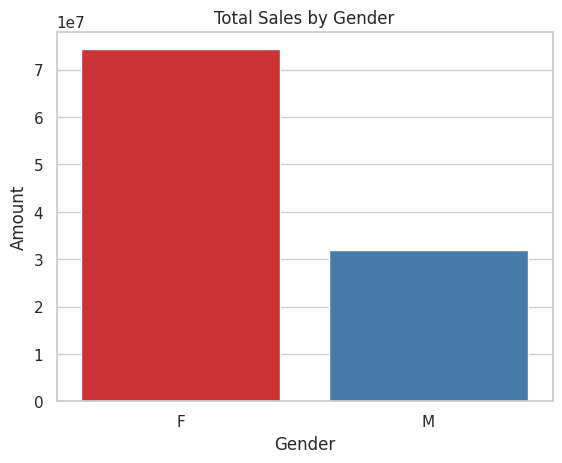

In [5]:
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

# Total amount spent by gender
sales_by_gender = df.groupby('Gender')['Amount'].sum().reset_index()

sns.barplot(x='Gender', y='Amount', data=sales_by_gender, palette='Set1')
plt.title("Total Sales by Gender")
plt.show()


***Age Group Distribution***

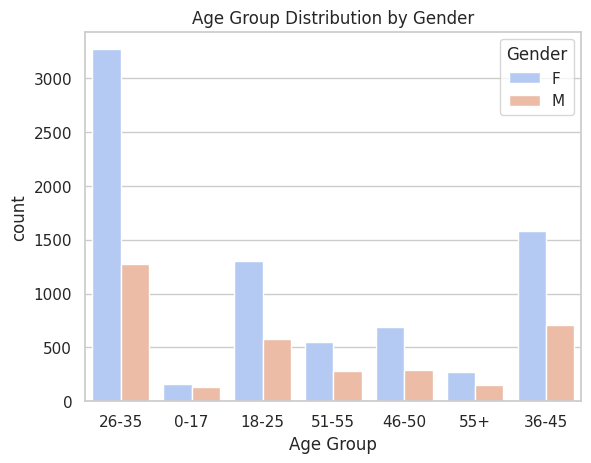

/tmp/ipython-input-571383224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Amount', data=sales_by_age, palette='viridis')


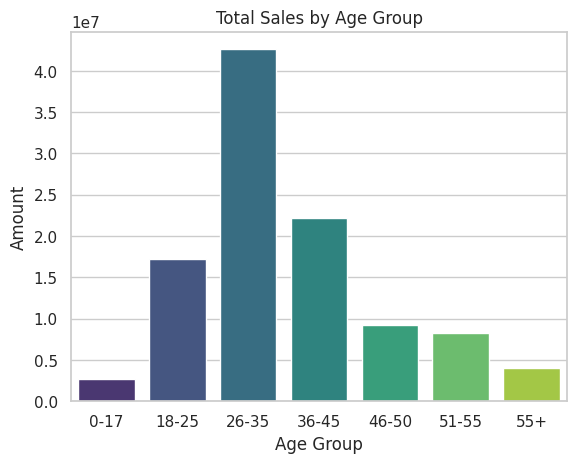

In [6]:
sns.countplot(x='Age Group', hue='Gender', data=df, palette='coolwarm')
plt.title("Age Group Distribution by Gender")
plt.show()

# Total amount spent by age group
sales_by_age = df.groupby('Age Group')['Amount'].sum().reset_index()

sns.barplot(x='Age Group', y='Amount', data=sales_by_age, palette='viridis')
plt.title("Total Sales by Age Group")
plt.show()


**State-wise Analysis**

/tmp/ipython-input-1188281327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_state.index, y=sales_by_state.values, palette='rocket')


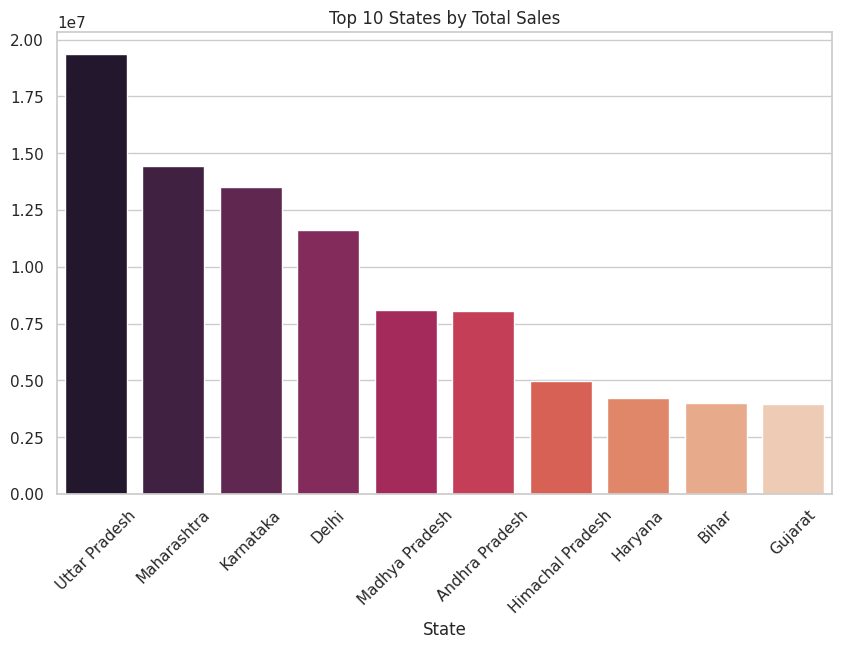

In [7]:
# Top 10 states by total sales
sales_by_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values, palette='rocket')
plt.xticks(rotation=45)
plt.title("Top 10 States by Total Sales")
plt.show()


**Marital Status Analysis**

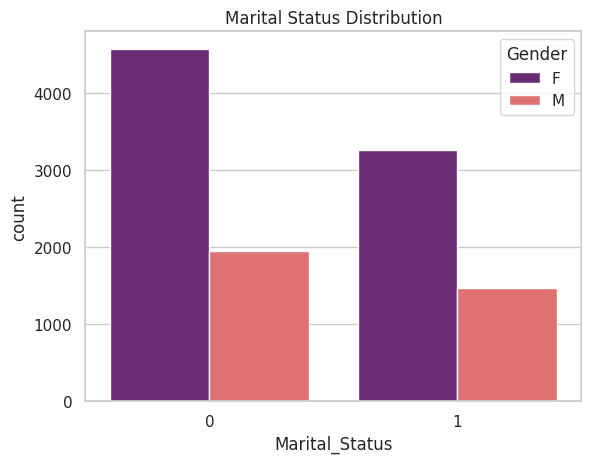

/tmp/ipython-input-394911330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='Amount', data=sales_by_marital, palette='cubehelix')


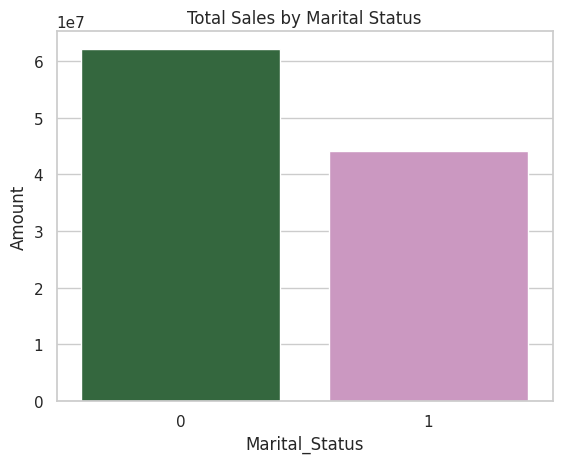

In [8]:
sns.countplot(x='Marital_Status', hue='Gender', data=df, palette='magma')
plt.title("Marital Status Distribution")
plt.show()

# Sales by marital status
sales_by_marital = df.groupby('Marital_Status')['Amount'].sum().reset_index()

sns.barplot(x='Marital_Status', y='Amount', data=sales_by_marital, palette='cubehelix')
plt.title("Total Sales by Marital Status")
plt.show()


**Occupation Analysis**

/tmp/ipython-input-3037844634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_occ.index, y=sales_by_occ.values, palette='coolwarm')


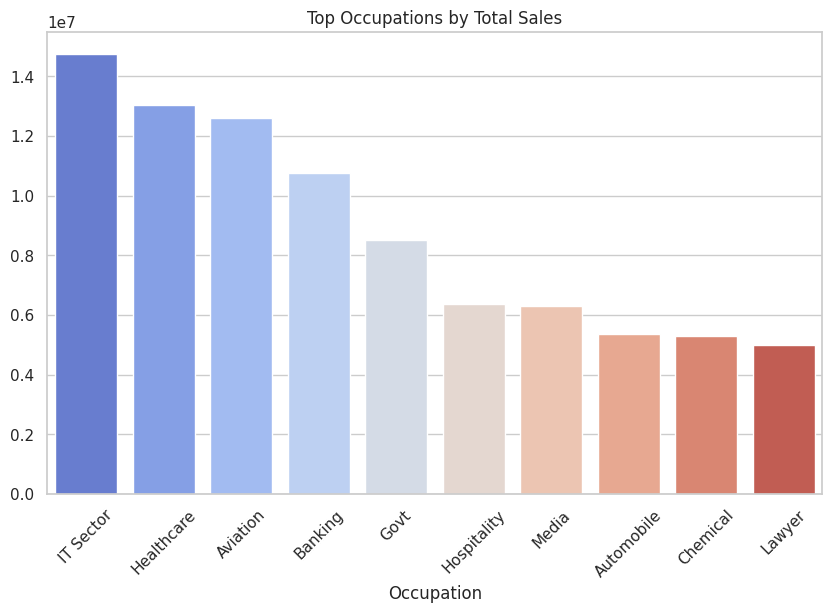

In [9]:
# Top 10 occupations by total sales
sales_by_occ = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_occ.index, y=sales_by_occ.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top Occupations by Total Sales")
plt.show()


**Product Category Analysis**

/tmp/ipython-input-658847153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_cat.index, y=sales_by_cat.values, palette='Spectral')


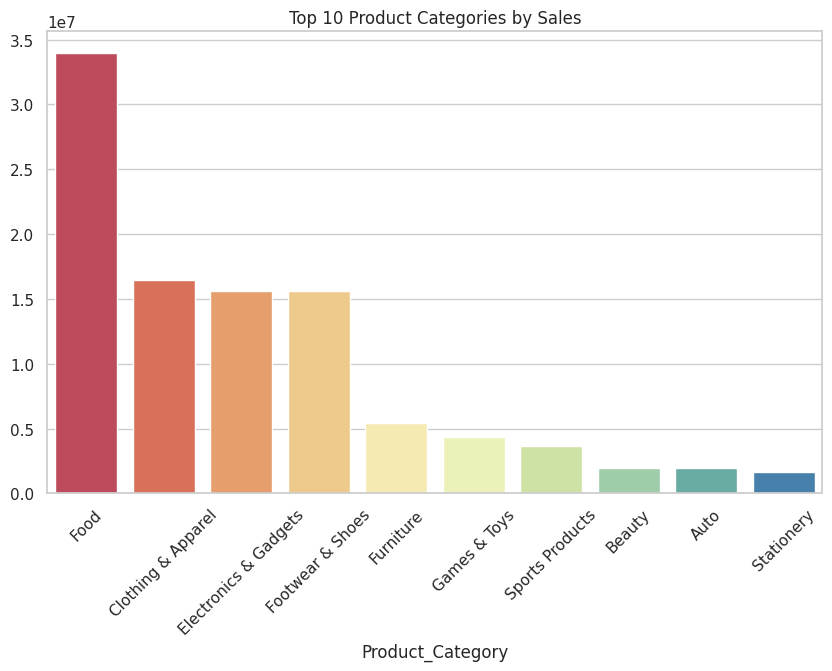

In [10]:
# Top 10 product categories
sales_by_cat = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_cat.index, y=sales_by_cat.values, palette='Spectral')
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories by Sales")
plt.show()


**Top Selling Products**

/tmp/ipython-input-1398185807.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='tab10')


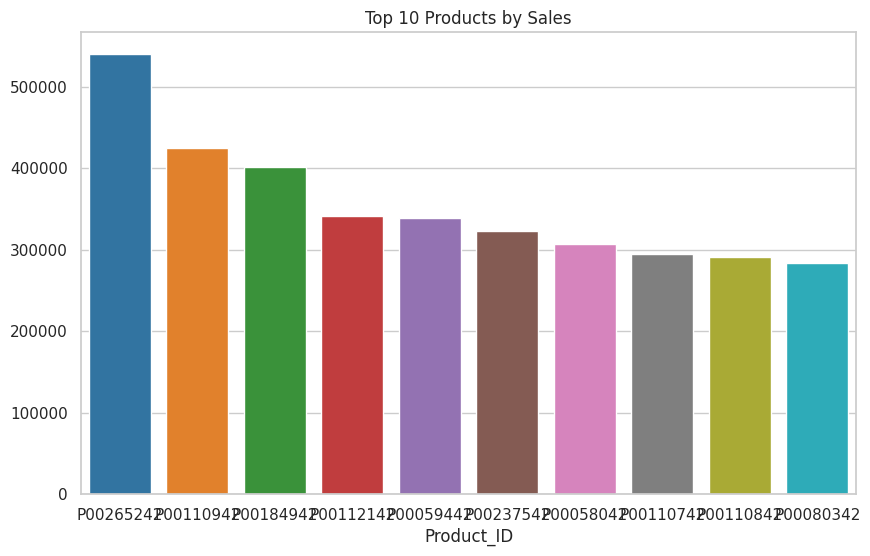

In [11]:
# Top 10 sold products
top_products = df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values, palette='tab10')
plt.title("Top 10 Products by Sales")
plt.show()
